In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uncertainties
from uncertainties import unumpy
from dissertation_codes.utils import compute_gamma


In [9]:
G_NV_x = ((65335-50000)*(2**-10))*5*uncertainties.ufloat(2.41e-7*1e-12*1e3, 0.04778e-7*1e-12*1e3)*uncertainties.ufloat(716077.3, 75152.6)
G_NV_y = ((19440)*(2**-10))*5*uncertainties.ufloat(2.01e-7*1e-12*1e3, 0.058e-7*1e-12*1e3)*uncertainties.ufloat(469968, 49314.4)

In [10]:
G_NV_x*0.71, G_NV_y

(9.174641980585963e-09+/-9.799121592862737e-10,
 8.966658993750001e-09+/-9.758119348054585e-10)

In [11]:
def theoretical_delay(delay, G, m, gamma, omega, T=293):
    g = G/(gamma*omega)
    k = (omega**2)*m
    Q_0 = omega/gamma
    first_term = T/(1+g*np.sin(delay))
    second_term = g/(2*Q_0)
    second_term = second_term*((np.sin(delay)*(delay-g*np.cos(delay)))+g*delay)
    second_term = second_term*(1/np.power(1+g*np.sin(delay),2))
    return first_term + second_term

phi = np.linspace(0, 2*np.pi+1, 300)
m = 2200*4*np.pi*np.power(uncertainties.ufloat(143e-9,3e-9)/2,3)/3
gamma = uncertainties.ufloat(5.5e3,0.02*5.5e3)
omega = 2*np.pi*94e3
G = 1e-9/m


In [12]:
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams.update({
    "text.usetex": True,
})

In [13]:
delay_x = pd.read_csv("../../data/1550/delay/delay_x_50000.csv")
delay_y = pd.read_csv("../../data/1550/delay/delay_y_19440.csv")

In [14]:
delay_x.head()

,Unnamed: 0,delay,mean_temps_x,std_temps_x,mean_temps_y,std_temps_y,phase_x,phase_y
0,0,31,119.410133,21.379969,293.258556,62.501077,1.599247,1.714656
1,1,3,185.623357,33.235216,294.290186,65.881549,0.507078,0.543671
2,2,135,665.925106,119.231572,292.335195,59.475384,5.655872,6.064028
3,3,170,162.862687,29.159997,292.639603,60.472875,7.021083,7.527759
4,4,100,1021.545033,182.904082,291.513693,56.783462,4.290662,4.600297


In [15]:
delay_y.head()

,Unnamed: 0,delay,mean_temps_x,std_temps_x,mean_temps_y,std_temps_y,phase_x,phase_y
0,0,36,277.726487,56.637899,138.575228,27.598309,1.794277,1.923761
1,1,3,310.679103,67.379874,204.511684,40.730055,0.507078,0.543671
2,2,70,273.386016,55.222982,345.584628,68.825803,3.120481,3.345671
3,3,30,311.590342,67.676921,142.239184,28.328014,1.560241,1.672835
4,4,50,295.530719,62.441766,177.922373,35.434592,2.340361,2.509253


In [17]:
delay_x.sort_values(by="delay").head()

,Unnamed: 0,delay,mean_temps_x,std_temps_x,mean_temps_y,std_temps_y,phase_x,phase_y
19,19,0,216.217546,38.712999,292.900770,61.328674,0.390060,0.418209
1,1,3,185.623357,33.235216,294.290186,65.881549,0.507078,0.543671
37,37,6,166.949082,29.891652,292.533903,60.126515,0.624096,0.669134
7,7,10,163.969993,29.358257,292.162076,58.908103,0.780120,0.836418
38,38,13,159.987221,28.645155,293.284539,62.586218,0.897138,0.961880


In [22]:
0.390060*(1/97e3)/(2*np.pi), 0.418209*(1/104e3) 

(6.399997639425227e-07, 4.021240384615384e-06)

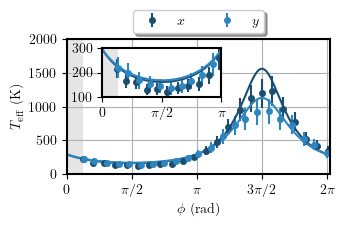

In [36]:
colors = ['#2E86C1', '#85C1E9', '#1B4F72']

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(3.4, 1.75, forward=True)

theory_x = theoretical_delay(phi, 0.71*G_NV_x/m, m, gamma, 2*np.pi*97e3)
theory_y = theoretical_delay(phi, G_NV_y/m, m, gamma, 2*np.pi*104e3)

delay_x = delay_x.sort_values(by='phase_y')
ax1.errorbar(delay_x['phase_x'].values[::2], delay_x['mean_temps_x'].values[::2], yerr=delay_x['std_temps_x'].values[::2], fmt='o', color=colors[2], label=r'$x$', markersize=4)
ax1.plot(phi, unumpy.nominal_values(theory_x), color=colors[2], linestyle='solid', label=r'_$T_{\rm{eff}}^x$')# - unumpy.std_devs(theory_x), unumpy.nominal_values(theory_x) + unumpy.std_devs(theory_x), alpha=0.2)

delay_y = delay_y.sort_values(by='phase_y')
ax1.errorbar(delay_y['phase_y'].values[::2], delay_y['mean_temps_y'].values[::2], yerr=delay_y['std_temps_y'].values[::2], fmt='o', color=colors[0], label=r'$y$', markersize=4)
ax1.plot(phi, unumpy.nominal_values(theory_y), color=colors[0], label=r'_$T_{\rm{eff}}^x$')# - unumpy.std_devs(theory_y), unumpy.nominal_values(theory_y) + unumpy.std_devs(theory_y), alpha=0.2)


#ax1.plot(t[::10]/1e-3, traces_x[0,:][::10]/1e-6)

#ax1.set_xlim([0, t.max()/1e-3])
ax1.set_yticks([0, 500, 1000, 1500, 2000])
ax1.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
ax1.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])
#ax1.set_xticklabels([r'0', r'$\pi/2$', r'', r'3', r'4'])

              #  labels=)
#ax1.grid(True, which="both", ls="-")
ax1.set_ylabel(r'$T_{\rm{eff}}$ (K)')
ax1.set_xlabel(r'$\phi$ (rad)')

ax1.set_ylim([0, 2000])
ax1.set_xlim([0, 2*np.pi+0.08])
#ax2.set_ylabel(r'$y$ $(\mu \textrm{m})$')
ax1.grid(True, which="both", ls="-")
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.27),
          ncol=4, fancybox=True, shadow=True)

ax1.axvspan(0, 2*np.pi*10*64e-9/(1/100e3), facecolor='0.2', alpha=0.125, zorder=-100)

#ax2.set_yticks([-0.2,0,0.2])
left, bottom, width, height = [0.23, 0.55, 0.35, (4/5)*0.35]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.set_yticks([0, 100, 200, 300])
ax2.set_xticks([0, np.pi/2, np.pi])
ax2.set_xticklabels([r'$0$', r'$\pi/2$', r'$\pi$'])
delay_x = delay_x.sort_values(by='phase_y')
ax2.errorbar(delay_x['phase_x'].values[::2], delay_x['mean_temps_x'].values[::2], yerr=delay_x['std_temps_x'].values[::2], fmt='o', color=colors[2], label=r'$x$', markersize=4)
ax2.plot(phi, unumpy.nominal_values(theory_x), color=colors[2], linestyle='solid', label=r'_$T_{\rm{eff}}^x$')# - unumpy.std_devs(theory_x), unumpy.nominal_values(theory_x) + unumpy.std_devs(theory_x), alpha=0.2)

delay_y = delay_y.sort_values(by='phase_y')
ax2.errorbar(delay_y['phase_y'].values[::2], delay_y['mean_temps_y'].values[::2], yerr=delay_y['std_temps_y'].values[::2], fmt='o', color=colors[0], label=r'$y$', markersize=4)
ax2.plot(phi, unumpy.nominal_values(theory_y), color=colors[0], label=r'_$T_{\rm{eff}}^x$')# - unumpy.std_devs(theory_y), unumpy.nominal_values(theory_y) + unumpy.std_devs(theory_y), alpha=0.2)
ax2.set_xlim([0, np.pi])
ax2.set_ylim([100, 300])
ax2.axvspan(0, 2*np.pi*10*64e-9/(1/100e3), facecolor='0.2', alpha=0.125, zorder=-100)


plt.savefig('../../plots/Chapter 5/delay.pdf', dpi=300, bbox_inches = 'tight')
plt.show()